# Challenge 4: Nested dictionaries

Next week we will deal with web scraping and API's. Python wise this means since we will encounter file formats like JSON we will have to deal with a lot of dictionaries. Not only ordinary dictionaries, but also nested ones. In this lab we will train handling them.

In the following, if we show values with markdown, just copy-paste them into your `# my code here` field if you need them.

**Warm up phase: Here are some keys and values. Use them to build a dictionary called `numbers_dct`**

```python
keys = ['hundred', 'twohundred', 'threehundred']
values = [10, 20, 30]
```

In [2]:
keys = ['hundred', 'twohundred', 'threehundred']
values = [10, 20, 30]

In [3]:
numbers_dct = dict(zip(keys, values))

In [4]:
numbers_dct

{'hundred': 10, 'twohundred': 20, 'threehundred': 30}

**Here are two dictionaries. Merge their entries to a third dictionary**

```python
dict1 = {'One': 1, 'Two': 2, 'Six': 6}
dict2 = {'Thirty': 30, 'Fourty': 40, 'Fifty': 50}
```

In [13]:
dict1 = {'One': 1, 'Two': 2, 'Six': 6}
dict2 = {'Thirty': 30, 'Fourty': 40, 'Fifty': 50}

In [16]:
dict3 = {**dict1, **dict2}

In [17]:
print (dict3)

{'One': 1, 'Two': 2, 'Six': 6, 'Thirty': 30, 'Fourty': 40, 'Fifty': 50}


**Nested dictionaries**

Here comes a bigger, nested dictionary. Store Martin's French grades in a variable called `martins_french` by navigating to the value using keys and values. Remember, while you drill down the structure of the dictionary and you encounter a new dictionary, you can always use `.keys()` and `.values()` to not loose orientation.

In [18]:
sampleDict = {
    "class":{
        "student_list":{
            "Anna":{
                "marks":{
                    "physics":[70, 20, 100, 20],
                    "history":[80,10,55,35],
                    "math":[100, 90, 70, 35],
                }
            },
            "Martin":{
                "marks":{
                    "french":[20, 10, 35, 45],
                    "spanish":[40, 75, 50, 90],
                    "math": [90,85, 90, 95],
                }
            },
            "Richard":{
                "marks":{
                    "physics":[10, 10, 0, 90],
                    "biology":[50, 50, 70, 75],
                    "math":[90, 70, 50, 40],
                }
            }
        }
    }
}

In [21]:
martins_french=sampleDict["class"]["student_list"]["Martin"]["marks"]["french"]


In [22]:
print (martins_french)

[20, 10, 35, 45]


**Calculate the mean of Richard's biology's grades**

In [24]:
import numpy as np
np.mean(sampleDict["class"]["student_list"]["Richard"]["marks"]["biology"])

61.25

**Return a list of all the students**

In [27]:
list(sampleDict["class"]["student_list"].keys())

['Anna', 'Martin', 'Richard']

**Return Anna's 2nd grade in history**

In [28]:
sampleDict["class"]["student_list"]["Anna"]["marks"]["history"][1]

10

**Return all the grades that are 3rd in the list for every subject for all the students**

Use appropriate `for` loops and a `print()` statement

In [32]:
for student in sampleDict['class']['student_list']:
        for marks in sampleDict['class']['student_list'][student].values():
            for subject_values in marks.values():
                print(subject_values[2])

100
55
70
35
50
90
0
70
50


**Get all the grades and store them in a list `all_grades` Calculate the mean (solution: 55.97)**

You can of course use a modified version of your solution of the previous question.

In [46]:
all_grades=[]

for student in sampleDict['class']['student_list']:
        for marks in sampleDict['class']['student_list'][student].values():
            for subject_values in marks.values():
                for value in subject_values:
                    all_grades.append(value)     

In [49]:
print(all_grades)

[70, 20, 100, 20, 80, 10, 55, 35, 100, 90, 70, 35, 20, 10, 35, 45, 40, 75, 50, 90, 90, 85, 90, 95, 10, 10, 0, 90, 50, 50, 70, 75, 90, 70, 50, 40]


In [50]:
np.mean(all_grades)

55.97222222222222

**Save that list as a column in a pandas dataframe and plot a histogram with it**

In [52]:
import pandas as pd

df=pd.DataFrame(all_grades, columns = ['grades'])

In [54]:
df.head()

,grades
0,70
1,20
2,100
3,20
4,80


<AxesSubplot:ylabel='Frequency'>

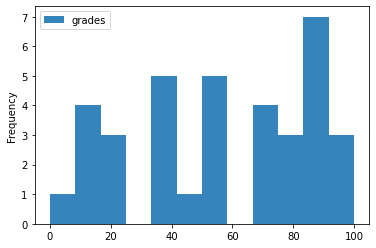

In [57]:
df.plot.hist(bins=12, alpha=0.9)

**Return all the students subjects. Watch out: We don't want repetitions!**

In [66]:


all_subjects = []
for student in sampleDict['class']['student_list']:
        for marks in sampleDict['class']['student_list'][student].values():
            for subject in marks.keys():
                all_subjects.append(subject)

all_subjects = set(all_subjects)

In [67]:
all_subjects

{'biology', 'french', 'history', 'math', 'physics', 'spanish'}

**Richard heard you're a data enthusiast and asks you to hack the school server and and replace his worst physics grade rounded to full integers (0) with the mean of his physics grades (he doesn't want to raise suspicion). Help him do that. Check wether your hack was successful by printing his physics grade**

In [68]:
sampleDict['class']['student_list']['Richard']['marks']['physics']

[10, 10, 0, 90]

In [72]:
richards_physics_mean=round(np.mean(sampleDict['class']['student_list']['Richard']['marks']['physics']))

In [73]:
richards_physics_mean

28

In [74]:
sampleDict['class']['student_list']['Richard']['marks']['physics'][2] = richards_physics_mean

In [76]:
sampleDict['class']['student_list']['Richard']['marks']['physics']

[10, 10, 28, 90]

**The hack was discovered! They found out it must have been Richard because his physics grade is not a multiple of 5 like all the other grades**

Expell Richard (poor Richard!) by removing him from the dictionary. Use `del`. And print the resulting class dictionary.

In [78]:
del sampleDict['class']['student_list']['Richard']

In [79]:
sampleDict

{'class': {'student_list': {'Anna': {'marks': {'physics': [70, 20, 100, 20],
     'history': [80, 10, 55, 35],
     'math': [100, 90, 70, 35]}},
   'Martin': {'marks': {'french': [20, 10, 35, 45],
     'spanish': [40, 75, 50, 90],
     'math': [90, 85, 90, 95]}}}}}